# Dive Into Design Patterns

## Introduction to OOP

### Object Oriented Programming

UML class diagrams representing the "Cat" class object.
* Fields and Methods are the ***members*** of the class.
* Data stored in the corresponding fields is the ***state*** of the class.
* All methods define its ***behavior***.


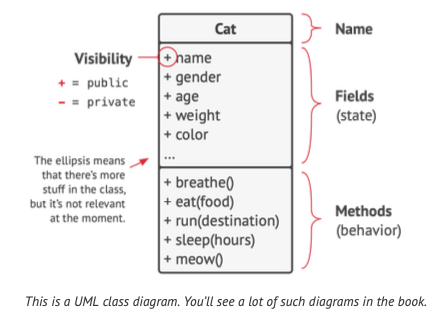

## Class Hierarchies

Sometimes the class structure could be further abstracted into a ***superclass*** to fulfill the role as the parent of more ***subclasses***.

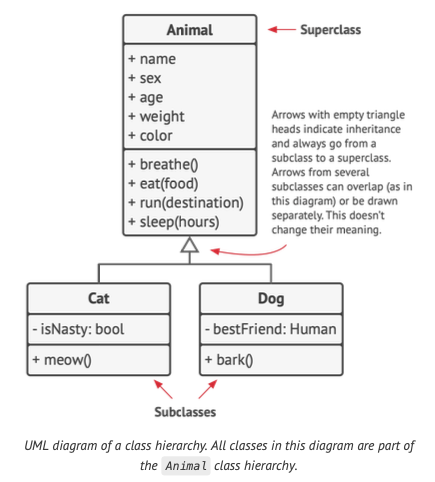

We could even go further as in:

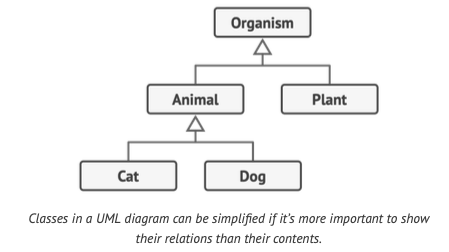

Subclasses can override the behavior of methods that they inherit from parent classes. A subclass can either completely replace the default behavior or just enhance it with some extra stuff.

## Pillars of OOP

* Abstraction
* Encapsulation
* Inheritance
* Polymorphism

### Abstraction

A model of a real-world object or phenomenon, limited to a specific context, which represents all details relevant to the context with high accuracy and omits all the rest.

### Encapsulation

Each object has an interface, a ***public*** part of an object, open to interactions with other objects.

Is the ability to hidde parts of its state and behaviors from other objects, exposing only a limited, but useful and operational, interface to the rest of the program.

Encapsulating means making it ***private***, and thus accesible only from within the methods of its own class.

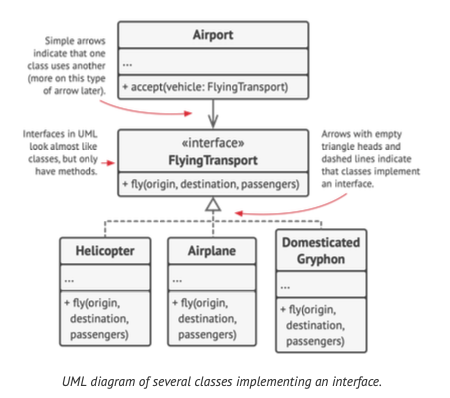

### Inheritance

Is the capability of constructing new subclasses from higher-order abstracted ones, allowing for code reusability and code centralization.

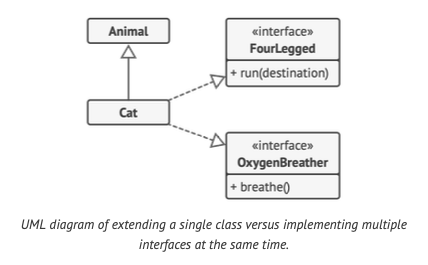

### Polymorphism

In the case of Animals, all animals would make a sound, but each animal would have a particular sound. This leads us to anticipate that the parent class should have the ***make_sound abstract*** method, and that all subclasses should override it to fit their desired sound.

This corresponds to the ability of a single parent class to acquire multiple forms.

## Relations Between Objects

### Dependency

Is the most basic and the weakest type of relations between classes.

There is a dependency between two classes if some changes to the definition of one class might result in modifications to another class.

Usually appears when using concrete classes and names in code and can be made weaker by adding interfaces or abstract classes.

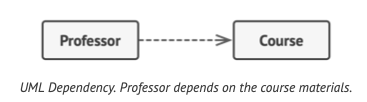

### Association

A relationship in which one object uses or interacts with another. A bi-directional association is normal.

Association can be seen as a specialized kind of dependency, where an object always has access to the objects with which it interacts, stablishing a permanent link. It generally relates to a field that contains some other object or a method that returns some other object.

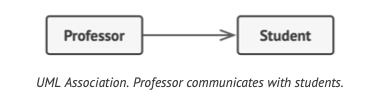

### Aggregation

A particular type of association that represents ***one-to-many***, ***many-to-many*** or ***whole-part*** relations between multiple objects.

Under aggregation, an object has a set of other objects and serves as a container or collection. 

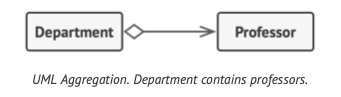

A ***Department*** can have 0, 1 or many ***Professor***s

### Composition

A specific kind of aggregation, where one object is composed of one or more instances of the other. It is distinct in the sense that the component can only exist as a part of the composition.

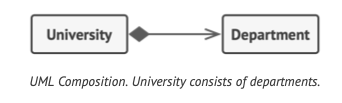

### The Big Picture

* **Dependency:** Class A can be affected by changes in Class B.
* **Association:** Object A knows about object B. Class A depends on B.
* **Aggregation:** Object A knows about Object B, and consists of B. Class A depends on B.
* **Composition:** Object A knows about Object B, consists of B, and manages B's life cycle. Class A depends on B.
* **Implementation:** Class A defines methods declared in interface B. Objects A can be treated as B. Class A depends on B.
* **Inheritance:** Class A inherits interface and implementation of class B but can extend it. Objects A can be treated as B. Class A depends on B.

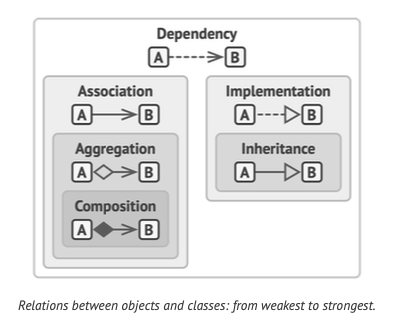

## Introduction to Patterns

### What's a Design Pattern?

Pre-made customizable blue-prints that help in solving recurring design problems in software development. A general concept for solving a particular problem.

#### What does the pattern consist of?

* ***Intent:*** Briefly describing both the problem and the solution.
* ***Motivation:*** Explaining the problem and the solution the pattern makes possible.
* ***Structure:*** Classes of each part of the pattern and how they are related.
* ***Code example:*** Makes it easier to grasp the idea behind the pattern.

#### Classification of patterns

Design patterns differ in their complexity, level of detail and scale of applicability. 

The most basic and low-level patterns are often called *idioms* and they usually apply to a single programming language.

The most universal and high-level patterns are *architectural* patterns. Developers can implement these patterns in virtually any language and can be used to design the architecture of an entire application.

* ***Creational Patterns:*** Provide object creation mechanisms that increase flexibility and reuse of existing code.
* ***Structural Patterns:*** Explain how to assemble objects and classes into larger structures, while keeping these structures flexible and efficient.
* ***Behavioral Patterns:*** Take care of effective communication and the assignment of responsibilities between objects.

#### Who invented patterns?

Patterns are typical solutions that arise from common problems in object-oriented design. When a solution gets repeated over and over, someone eventually abstracts it, names it and describes it in detail.

### Why Should I Learn Patterns?

They are a toolkit of tried and tested solutions to common problems that help when thinking of or designing software.

They also define common concepts that encapsulate deeper meaning and that make communication simpler and more straightforward.

## Software Design Principles

### Features of Good Design

#### Code Reuse

Cost and time are the main relevant KPIs in software development. In this, code reusability is one of the principal ways to reduce developing costs. Instead of developing the same thing over and over, just reuse existing code.

It turns out that making reusable code is not easy though. Coupling, dependencies, hardcoding and such, all reduce flexibility and make code harder to reuse.

Design patterns are a helpful framework to increase code reusability, but might lead to more complex code.

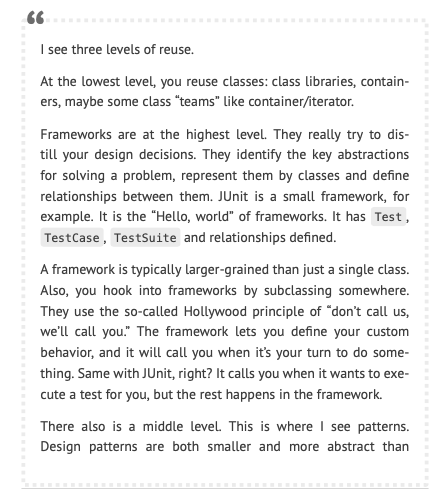
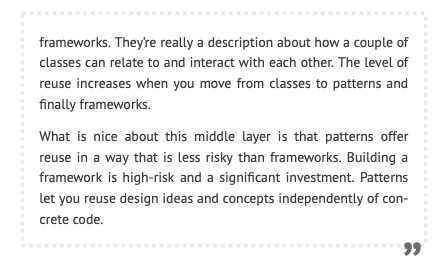

#### Extensibility

***Change*** is a constant in programming.

Before developing a solution we conceive an idea of it. After developing the solution we gained deep insight on its inner workings and could proceed to reformulate a better solution while you have also gained some skill, so your developed code will always be outdated.

The problem for which we are developing the solution might also change. A client might want something more, something different, or something less. With a good displayed solution, a client would usually want more.

That's why its important to develop code that can change in a relatively easy way.

### Design Principles

#### Encapsulate What Varies

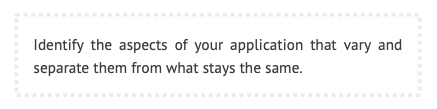

Minimize the repercusion of changes by isolating the varying parts of code in independent modules, which protects the rest of the code from adverse effects.

##### Encapsulation on a Method Level

A piece of code that calculates the total amount that a customer needs to pay based on their location requires to know about the different taxes. Furthermore, taxes can change, meaning that the piece of code related to taxes has a high probability of changing in the future.

###### Example

In [ ]:
def get_order_total(order):
    total = 0
    for item in order:
        total += item.price * item.quantity
        if order.country == 'US':
            total += total * 0.07 ## US sales tax
        elif order.country == 'EU':
            total += total * 0.20 ## European VAT
    return total

###### Encapsulation

In [1]:
def get_order_total(order):
    total = 0
    for item in order:
        total += item.price * item.quantity
    total += total * get_tax_rate(order.country)
    return total

def get_tax_rate(country):
    if country == 'US':
        return 0.07 ## US sales tax
    elif country == 'EU':
        return 0.20 ## European VAT

##### Encapsulation on a Class Level

Over time, methods tend to turn more complicated, adding behaviors that require their own attributes and obfuscate the primary responsability of the containing class. Extracting everything to a new class makes the code clearer.

###### Example

In [2]:
class Order:
    def __init__(self, items, country, state, city, **args):
        self.items = items
        self.country = country
        self.state = state
        self.city = city
        #...
    def get_order_total(self):
        pass
    @classmethod # could be with self, but still
    def get_tax_rate(country, state, product):
        pass

###### Encapsulation

In [3]:
class Order:
    def _init_(self, items, country, state, city, taxCalculator, **args):
        self.items = items
        self.country = country
        self.state = state
        self.city = city
        self.taxCalculator = taxCalculator
        # ...
    def get_order_total(self):
        total = 0
        for item in self.items:
            total += item.price * item.quantity
        tax = total * self.taxCalculator(self.country, self.state, item)
        total += tax
        return total

#### Program to an Interface, not an Implementation

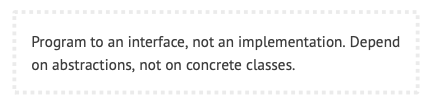

A design is flexible enough if you can easily change it or extend it without braking the already existing code.

The first approach of making two classes work together is by making one dependent on the other, but there are better more flexible ways to make those classes collaborate.

1. What exactly is needed by one object from the other? ***[Which methos does it use?]***
2. Define those methods in a new interface or abstract class.
3. Implement the class that work as a dependency with the new interface.
4. Make the first class dependent on the interface, rather than the other class.

Working ends up being the same, but the dependency injection is now much more flexible.

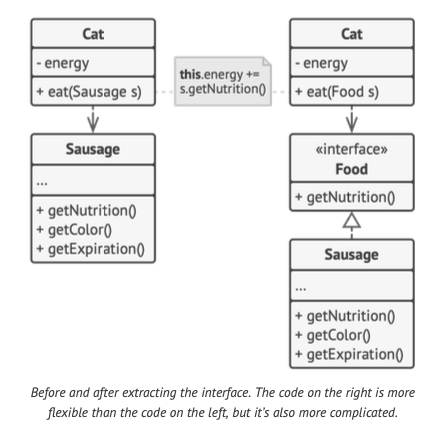

##### Example

In [4]:
class Company:
    def __init__(self, designer, programmer, tester):
        self.designer = designer
        self.programmer = programmer
        self.tester = tester
    def create_software(self):
        self.designer.design_architecture()
        self.programmer.write_code()
        self.tester.test_software()
        
class Designer:
    def __init__(self):
        pass
    def design_architecture(self):
        pass
    
class Programmer:
    def __init__(self):
        pass
    def write_code(self):
        pass
    
class Tester:
    def __init__(self):
        pass
    def test_software(self):
        pass

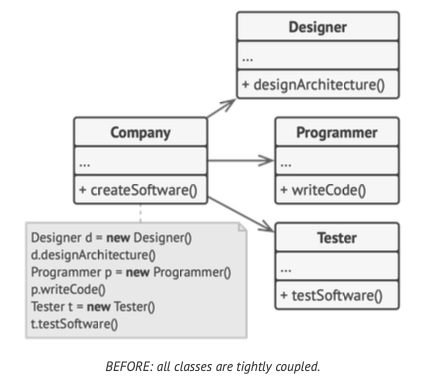

##### With Interface

In [11]:
from abc import ABC

class Company:
    def __init__(self):
        self.employees = [
            Designer,
            Programmer,
            Tester
        ]
    def create_software(self):
        for employee in self.employees:
            employee.do_work()

class Employee(ABC):
    def __init__(self):
        pass
    def do_work(self):
        pass
    
class Designer(Employee):
    def do_work(self):
        self.design_architecture()
    def design_architecture():
        pass
    
class Programmer(Employee):
    def do_work(self):
        self.write_code()
    def write_code(self):
        pass
    
class Tester(Employee):
    def do_work(self):
        self.test_software()
    def test_software(self):
        pass

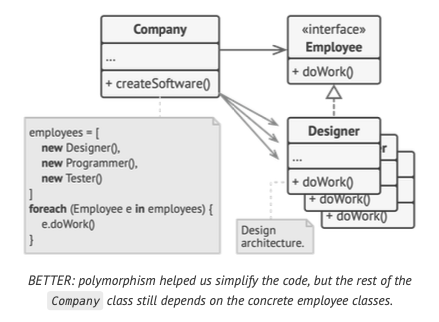

***We just implemented the Factory Method pattern! ;)***

##### Furthermore

In [13]:
from abc import ABC

class Company(ABC):
    def __init__(self, employees):
        self.employees = self.get_employees()
    def get_employees(self):
        pass
    def create_software(self):
        for employee in self.employees:
            employee.do_work()
            
class GameDevCompany(Company):
    def get_employees(self):
        return [
            Designer,
            Artist,
            Programmer
        ]
    
class OutsourcingCompany(Company):
    def get_employees(self):
        return [
            Programmer,
            Tester,
            Salesman
        ]

class Employee(ABC):
    def __init__(self):
        pass
    def do_work(self):
        pass
    
class Designer(Employee):
    def do_work(self):
        self.design_architecture()
    def design_architecture():
        pass
    
class Programmer(Employee):
    def do_work(self):
        self.write_code()
    def write_code(self):
        pass
    
class Tester(Employee):
    def do_work(self):
        self.test_software()
    def test_software(self):
        pass

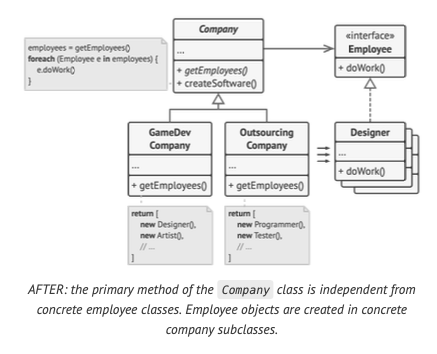

#### Favor Composition Over Inheritance

Inheritance is veyr straightforward and helpful, but comes with many problems that start becoming apparent after the program has a lot of interacting classes and changing anything becomes very hard.

* **A child class has to use all the abstract methods defined in the parent class**
* **When changing methods you need to verify that the new behavior is compatible with the base behavior** (You want to be able to pass the child class to any code that expects the parent class without breaking it)
* **Inheritance breaks encapsulation of the parent class** (Internal details of the parent class are accesed by all the child classes)
* **Child classes are thighly coupled with the parent class**
* **Reusing code through inheritance might lead to parallell inheritance hierarchies**

Composition switchs to ***"is a"*** to ***"has a"***.

###### Example

In [14]:
from abc import ABC

class Transport(ABC):
    def __init__(self):
        pass
    
class Truck(Transport):
    pass

class Car(Transport):
    pass

class ElectricTruck(Truck):
    pass

class CombustionEngineTruck(Truck):
    pass

class ElectricCar(Car):
    pass

class CombustionEngineCar(Car):
    pass

class AutopilotElectricTruck(ElectricTruck):
    pass

class AutopilotCombustionEngineTruck(CombustionEngineTruck):
    pass

class AutopilotElectricCar(ElectricCar):
    pass

class AutopilotCombustionengineCar(CombustionEngineCar):
    pass

***Every distinctive feature ends up being a new inheritance that has to address all the inheritances above. And every change in a class has to cascade below.***

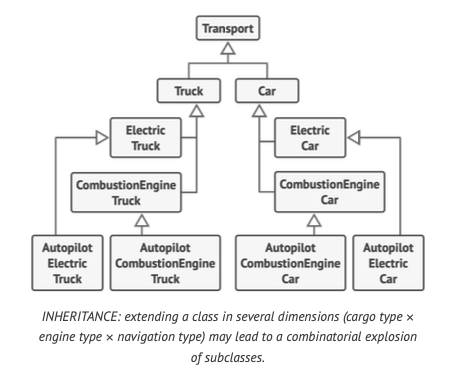

##### Composition

In [15]:
from abc import ABC

class Transport(ABC):
    def __init__(self, engine, driver, chasis):
        self.engine = engine
        self.driver = driver
        self.chasis = chasis
    def deliver(self, destination, cargo):
        pass
    
class Engine(ABC):
    def __init__(self):
        pass
    def move(self):
        pass
    
class CombustionEngine(Engine):
    pass

class ElectricEngine(Engine):
    pass

class Driver(ABC):
    def __init__(self):
        pass
    def navigate(self):
        pass
    
class Robot(Driver):
    pass

class Human(Driver):
    pass

class Chasis(ABC):
    def __init__(self):
        pass
    def kind(self):
        pass
    
class Car(Chasis):
    def kind(self):
        return 'Car'
    
class Truck(Chasis):
    def kind(self):
        return 'Truck'

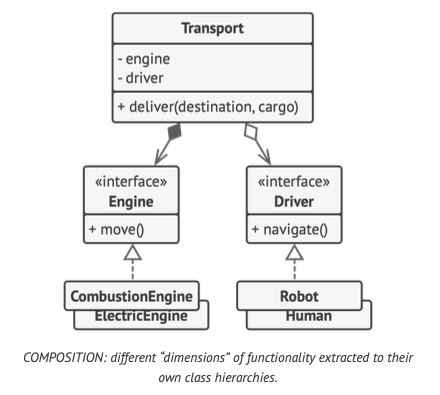